<center style="font-size:30px;padding-bottom:10px;color:DarkBlue;">Métodos Avanzados en Estadística</center>
<center> _____________________________________________________________________________________________ </center>
<p>&nbsp;</p>
<center style="font-size:25px;padding-bottom:10px;color:CornFlowerBlue;">Tema 4: Clasificación</center>
<center style="font-size:20px;padding-bottom:10px;color:LightCoral;">Entrega de ejercicios</center>
<center style="font-size:14px;">22 de diciembre 2021</center>
<center style="font-size:12px;">Gloria del Valle Cano</center>
<center style="font-size:12px;"><a href="mailto:gloria.valle@estudiante.uam.es">gloria.valle@estudiante.uam.es</a></center>

# Ejercicio 4
**Sea $(X, Y) \in \mathbb{R}^2$ un vector aleatorio tal que la distribución de $Y$ condicionada a $X$ es de Bernoulli de parámetro $(1 + e^{-\beta X})^{−1}$, donde $\beta \in \mathbb{R}$, y $P(Y = 0) = P(Y = 1) = 1/2$. Supongamos que queremos predecir $Y$ a partir de $X$. Responde a las siguientes preguntas, dejando el resultado en función del parámetro $\beta$.**

**(a) Determina la regla de clasificación óptima en este modelo.**

Se cumple por tanto que:

+ $P(Y = 1 | X = x) = (1 + e^{-\beta x})^{−1}$
+ $P(Y = 0 | X = x) = 1 - (1 + e^{-\beta x})^{−1}$

A raíz de esto podemos obtener los valores para los que la probabilidad es mayor que $\frac 1 2$.

$$
\begin{align}
(1 + e^{-\beta x})^{-1} > \frac 1 2 &\Longleftrightarrow 2 > 1 + e^{-\beta x} \\ &\Longleftrightarrow 1 < e^{-\beta x} \\ &\Longleftrightarrow \ln (1) < \ln (e)\beta x \\ &\Longleftrightarrow \beta x > 0
\end{align}
$$

Por tanto, la regla de clasificación óptima es la siguiente:

$$
g^{*}(x) = \begin{cases} 1, &\quad\text{ si } \beta x > 0 \\ 0, &\quad\text{ si } \beta x ≤ 0 \end{cases}
$$


**(b) Si $X$ tiene distribución uniforme en $(0, 1)$, calcula el error de la regla de clasificación del apartado anterior (error Bayes).**

La probabilidad de error de clasificación viene dada por:

$$
\mathcal{L}^* = \mathbb{E}\big(min\{\eta(X), 1 - \eta(X)\}\big) = \int \underbrace{min\{\eta(X), 1 - \eta(X)\}}_{h(x)}f(x)dx,
$$
tomando como $\eta(X) = P(Y = 1 | X = x) = (1 + e^{-\beta x})^{−1} $, $f(x)$ la distribución uniforme y $h(x)$:

$$
h(x) = \begin{cases} \eta(x), &\quad\text{ si } \beta < 0 \\ 1-\eta(x), &\quad\text{ si } \beta ≥ 0 \end{cases}
$$

Por tanto, para $\beta < 0$

$$
\begin{align}
\mathcal{L}^* = \int (1 + e^{-\beta x})^{−1} f(x)dx &= \int_0^1 (1 + e^{-\beta x})^{−1} dx \\ 
&= \int_0^1 \frac{e^{\beta x}}{1+e^{\beta x}}dx \\
&= \frac 1 \beta \int_0^1 \frac{\beta e ^{\beta x}}{1+e^{\beta x}}dx \\
&=\frac 1 \beta \ln(1 + e^{\beta x}) \Big|_0^1 \\
&= \frac{1}{2 \beta} \ln \Big(1 + e^{\beta}\Big)
\end{align}
$$

Para el caso completo
$$
\mathcal{L}^* = \begin{cases}  \frac{1}{2\beta} \ln \Big(1 + e^{\beta}\Big) , &\quad\text{ si } \beta < 0 \\ 1-  \frac{1}{2\beta} \ln \Big(1 + e^{\beta}\Big), &\quad\text{ si } \beta ≥ 0 \end{cases}
$$


**(c) Si $X$ tiene distribución uniforme en $(0, 1)$, calcula $\lim_{n \to \infty}$ $EL_n$, donde $L_n$ es la probabilidad de error correspondiente al clasificador del vecino más próximo. Compara el resultado con el del apartado anterior.**

Como vimos en clase, si $(X_1, Y_1)$ es el vecino más próximo de $(X,Y)$ entonces $X_1 \approx X$ y como consecuencia $Y_1$ e $Y$ se comportan aproximadamente como vaiid $B(1,\eta(x))$. Entonces:

$$
\mathbb{E}(\mathcal{L}_n) \approx \mathcal{L}_{1NN} := 2 \mathbb{E}(\eta(X)(1-\eta(X)))
$$

Por lo que se puede probar que $\lim_{n \to \infty}\mathbb{E}(\mathcal{L}_n) = \mathcal{L}_{1NN}$ para cualquier distribución de datos. Como además se verifica

$$
\mathcal{L}^* ≤ \mathcal{L}_{1NN} ≤ 2\mathcal{L}^*(1 - \mathcal{L}^*)
$$

calcularemos $\mathcal{L}_{1NN}$ y lo compararemos con el error bayes calculado en el apartado **b)**.

$$
\begin{align}
\mathcal{L}_{1NN} &= 2 \int f(x) (\eta(x)(1-\eta(x)))dx \\
                  &= 2 \int_0^1  (1 + e^{-\beta x})^{−1}  (1 - (1 + e^{-\beta x})^{−1}) dx \\
                  &= 2 \int_0^1 \frac{1-\frac{1}{1+e^{-\beta x}}}{1+e^{-\beta x}} dx \\
                  &= 2 \frac{tanh(\frac \beta 2)}{2\beta} = \frac{tanh(\frac \beta 2)}{\beta}
\end{align}
$$

* Para $\beta < 0$, $\beta = -1$:

$$
-\frac{\ln(e^{-1}+1)}{2}≤-\tanh\Big(-\frac{1}{2}\Big) \Longleftrightarrow -0.15... ≤ 0.46... \text{       Sí se cumple.}
$$

* Para $\beta ≥ 0$, $\beta = 1$:
$$
1-\frac{\ln(e+1)}{2}≤\tanh \Big(\frac 1 2\Big) \Longleftrightarrow 0.35 ... ≤ 0.46... \text{       Sí se cumple.}
$$

# Ejercicio 6
**En un experimento descrito en Prentice (1976) se expuso una muestra de escarabajos a cierto pesticida. Tras cinco horas de exposición a distintos niveles de concentración del pesticida algunos de los escarabajos murieron y otros sobrevivieron. Los resultados para cada dosis aparecen en la tabla siguiente.**

$$
\begin{aligned}[]
\begin{array}{ccc}
\hline
\text{Dosis} \; (log_10CS_2mgl^{-1})  & \text{N. insectos} & \text{N. muertos} \\ \hline
1.6907 & 59          & 6          \\ \hline
1.7242 & 60          & 13         \\ \hline
1.7552 & 62          & 18         \\ \hline
1.7842 & 56          & 28         \\ \hline
1.8113 & 63          & 52         \\ \hline
1.8369 & 59          & 53         \\ \hline
1.8610 & 62          & 61         \\ \hline
1.8839 & 60          & 60         \\ \hline
\end{array}
\end{aligned}
$$


**Formula un modelo de regresión logística para analizar estos datos y estima la probabilidad de que muera un escarabajo expuesto durante cinco horas a una dosis de concentración $1.8$.**

Se vuelcan los resultados del dataset en un dataframe y se ajusta el modelo con la función ```glm```de R (Generalized Linear Model) con el parámetro *family* como binomial, donde $X$ es referente a la dosis, $Y = 0$ si el escarabajo sobrevive y $Y = 1$ en caso contrario.

In [1]:
# Load data 
data <- cbind(c(1.6907, 59, 6),
              c(1.7242, 60, 13),
              c(1.7552, 62, 18),
              c(1.7842, 56, 28),
              c(1.8113, 63, 52),
              c(1.8369, 59, 53),
              c(1.8610, 62, 61),
              c(1.8839, 60, 60))

# Create dataframe
df <- as.data.frame(t(data))
colnames(df) <- c("Dose", "Insects", "Deaths")
df

# Get dose values
value <- df$Dose

# Fit model (deaths vs survivors)
model <- glm(cbind(df$Deaths, df$Insects-df$Deaths) ~ value, family=binomial)

# Predict
predicted <- predict(model, data.frame(value=1.8), type='response')

# Print
cat("Probabilidad de que el escarabajo muera: ", predicted)

Dose,Insects,Deaths
<dbl>,<dbl>,<dbl>
1.6907,59,6
1.7242,60,13
1.7552,62,18
1.7842,56,28
1.8113,63,52
1.8369,59,53
1.8610,62,61
1.8839,60,60


Probabilidad de que el escarabajo muera:  0.7249464

In [2]:
summary(model)


Call:
glm(formula = cbind(df$Deaths, df$Insects - df$Deaths) ~ value, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5941  -0.3944   0.8329   1.2592   1.5940  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -60.717      5.181  -11.72   <2e-16 ***
value         34.270      2.912   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.202  on 7  degrees of freedom
Residual deviance:  11.232  on 6  degrees of freedom
AIC: 41.43

Number of Fisher Scoring iterations: 4


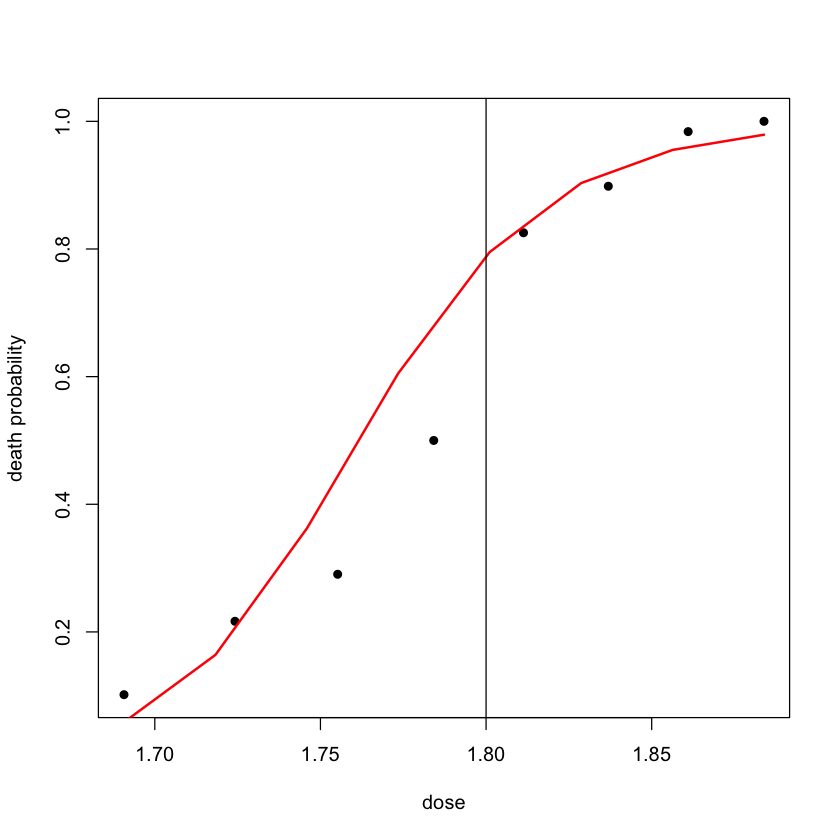

In [6]:
new_data <- data.frame(Dose = seq(min(df$Dose), max(df$Dose), len=8))
pred_value <- predict(model, new_data, type='response')
plot(value, df$Deaths / df$Insects, pch=16, ylab='death probability', xlab='dose')
lines(new_data$Dose, pred_value, col='red', lwd=2)
abline(v=1.8)